# Import Library

In [1]:
import datetime
from tqdm import tqdm

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression

# Selling Data

In [2]:
selling=pd.read_csv('./data/selling.csv')
selling

,id,timestamp,item,co_op,loc,supply,price,year,month,week,day,yemon,holiday
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.00,0.00,2019,1,1,1,2019-01,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.00,0.00,2019,1,1,2,2019-01,0
2,TG_A_J_20190103,2019-01-03,TG,A,J,606.01,17.28,2019,1,1,3,2019-01,0
3,TG_A_J_20190104,2019-01-04,TG,A,J,250.00,14.08,2019,1,1,4,2019-01,0
4,TG_A_J_20190105,2019-01-05,TG,A,J,323.52,12.50,2019,1,1,5,2019-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,4524.40,4.68,2023,2,9,0,2023-02,0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,4219.80,5.31,2023,2,9,1,2023-02,0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,3829.80,5.74,2023,3,9,2,2023-03,0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,4772.20,5.23,2023,3,9,3,2023-03,0


## Some Basic Statistics

In [3]:
selling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         59397 non-null  object 
 1   timestamp  59397 non-null  object 
 2   item       59397 non-null  object 
 3   co_op      59397 non-null  object 
 4   loc        59397 non-null  object 
 5   supply     59397 non-null  float64
 6   price      59397 non-null  float64
 7   year       59397 non-null  int64  
 8   month      59397 non-null  int64  
 9   week       59397 non-null  int64  
 10  day        59397 non-null  int64  
 11  yemon      59397 non-null  object 
 12  holiday    59397 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 5.9+ MB


In [4]:
selling.describe()

,supply,price,year,month,week,day,holiday
count,59397.000000,59397.000000,59397.000000,59397.000000,59397.000000,59397.000000,59397.00000
mean,118.945248,11.316807,2020.601445,6.320420,25.772160,2.998687,0.03985
std,522.639995,20.299414,1.201092,3.519942,15.382153,1.998374,0.19561
min,0.000000,0.000000,2019.000000,1.000000,1.000000,0.000000,0.00000
25%,0.000000,0.000000,2020.000000,3.000000,12.000000,1.000000,0.00000
50%,0.000000,0.000000,2021.000000,6.000000,26.000000,3.000000,0.00000
75%,38.000000,15.190000,2022.000000,9.000000,39.000000,5.000000,0.00000
max,12228.000000,209.090000,2023.000000,12.000000,53.000000,6.000000,1.00000


In [5]:
selling.corr(numeric_only=True)

,supply,price,year,month,week,day,holiday
supply,1.000000,-0.002297,0.024278,-0.120580,-0.122755,-0.069798,-0.046366
price,-0.002297,1.000000,0.029442,-0.076673,-0.080900,-0.152611,-0.113577
year,0.024278,0.029442,1.000000,-0.114541,-0.110539,0.000603,0.028548
month,-0.120580,-0.076673,-0.114541,1.000000,0.968650,-0.002461,-0.027984
week,-0.122755,-0.080900,-0.110539,0.968650,1.000000,0.000204,-0.003496
day,-0.069798,-0.152611,0.000603,-0.002461,0.000204,1.000000,0.011892
holiday,-0.046366,-0.113577,0.028548,-0.027984,-0.003496,0.011892,1.000000


In [ ]:
sns.lineplot(data=d_df,
             x='day',
             y='price',
             ci=None,
            color='orange')
plt.xlabel('day')
ax = plt.gca()
ax.set_xticklabels([0,'Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.ylabel('price (won/100kg)')
plt.show()

## Draw Boxplot & Lineplot about 'supply' & 'price' column

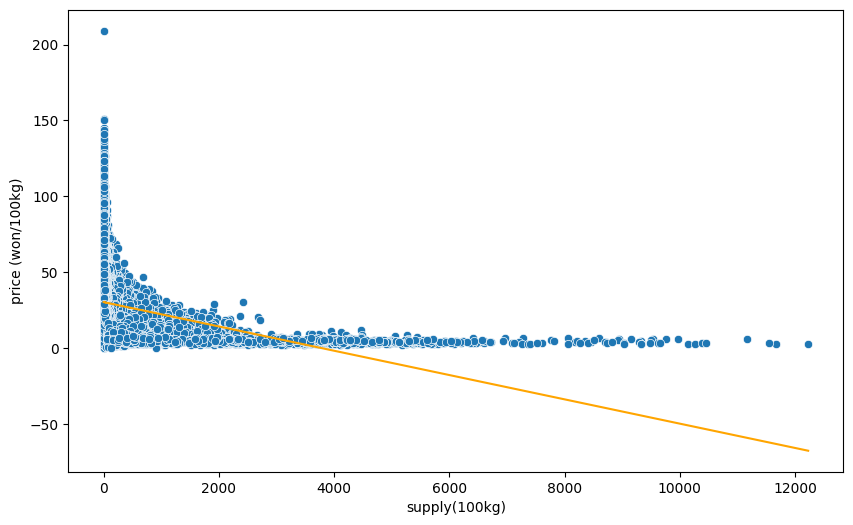

In [18]:
model = LinearRegression()
model.fit(X=selling[selling['supply']>0]['supply'].to_numpy().reshape(-1,1),
          y=selling[selling['supply']>0]['price'])
pred = model.predict(selling[selling['supply']>0]['supply'].to_numpy().reshape(-1,1))

fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=selling[selling['supply']>0],
            x = "supply",
            y = "price")
sns.lineplot(data=selling[selling['supply']>0],
            x="supply",
            y=pred,
            color='orange')
plt.xlabel('supply(100kg)')
plt.ylabel('price (won/100kg)')
plt.show()

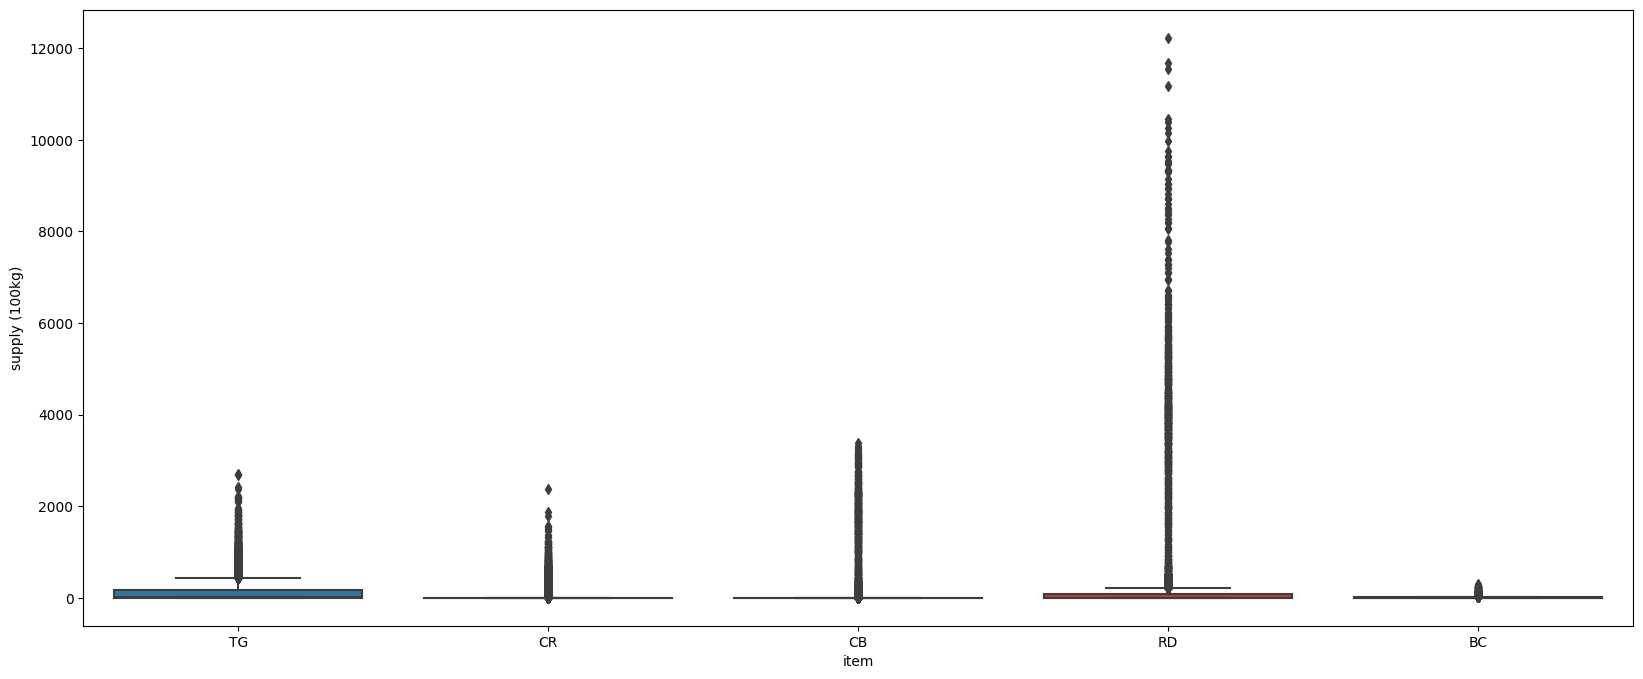

In [6]:
fig = plt.figure(figsize=(20, 8))
sns.boxplot(data=selling,
            x = "item",
            y = "supply")
plt.ylabel('supply (100kg)')
plt.show() # 특이사항 없음

C:\Users\USER\AppData\Local\Temp\ipykernel_22112\915352663.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=selling,


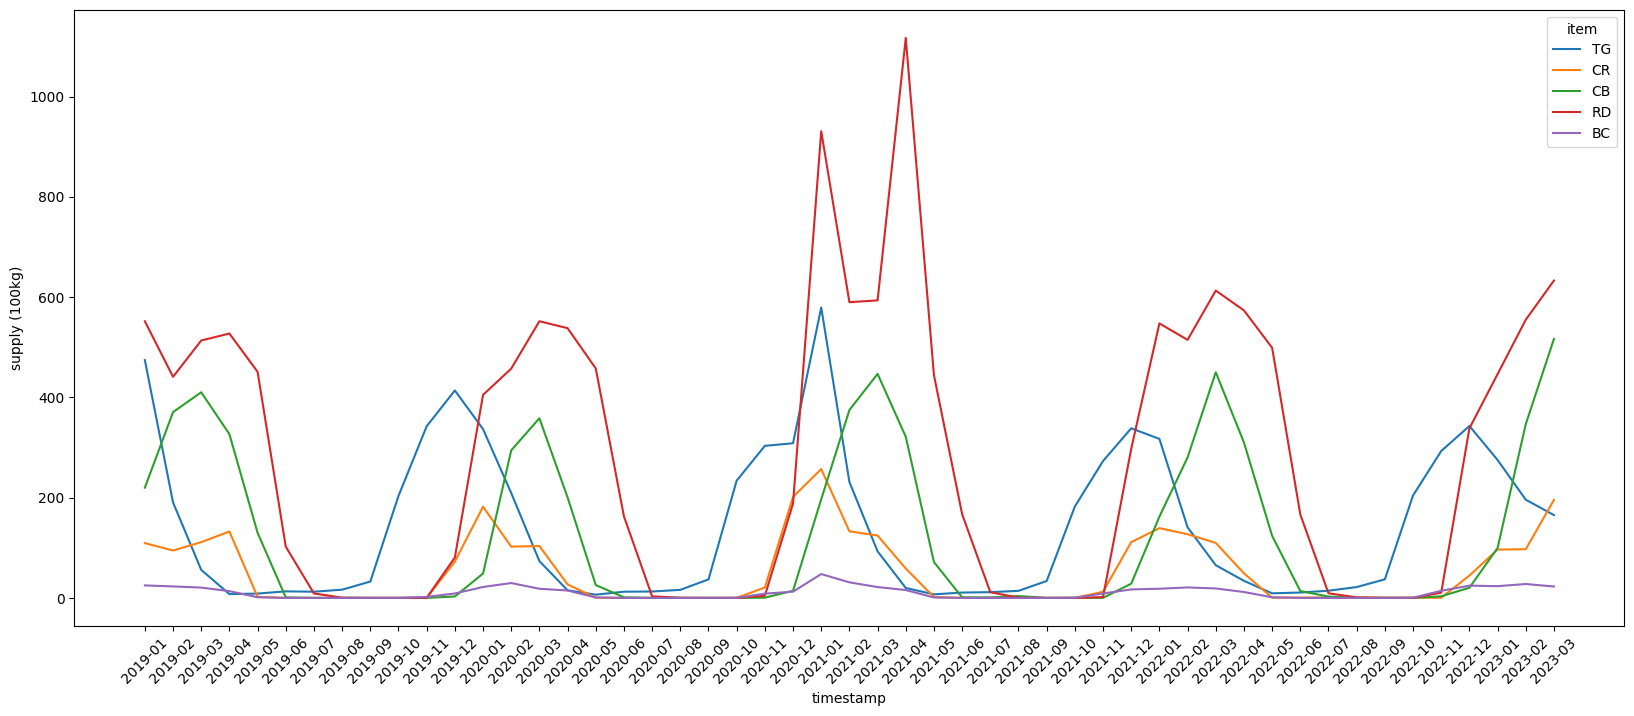

In [7]:
fig = plt.figure(figsize=(20, 8))
sns.lineplot(data=selling,
             x='yemon',
             y='supply',
             hue='item',
            ci=None)
plt.xticks(rotation=45)
plt.xlabel('timestamp')
plt.ylabel('supply (100kg)')
plt.show()

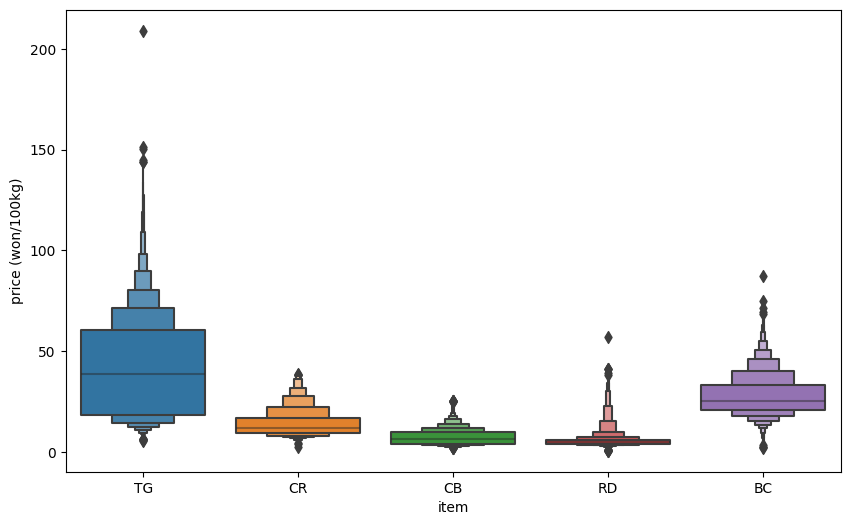

In [14]:
fig = plt.figure(figsize=(10, 6))
sns.boxenplot(data=selling[selling['price']>0],
            x = "item",
            y = "price")
plt.ylabel('price (won/100kg)')
plt.show() # 감귤(TG) 혼자 상이한 분포를 가진 모습

C:\Users\USER\AppData\Local\Temp\ipykernel_25556\3166371021.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=selling,


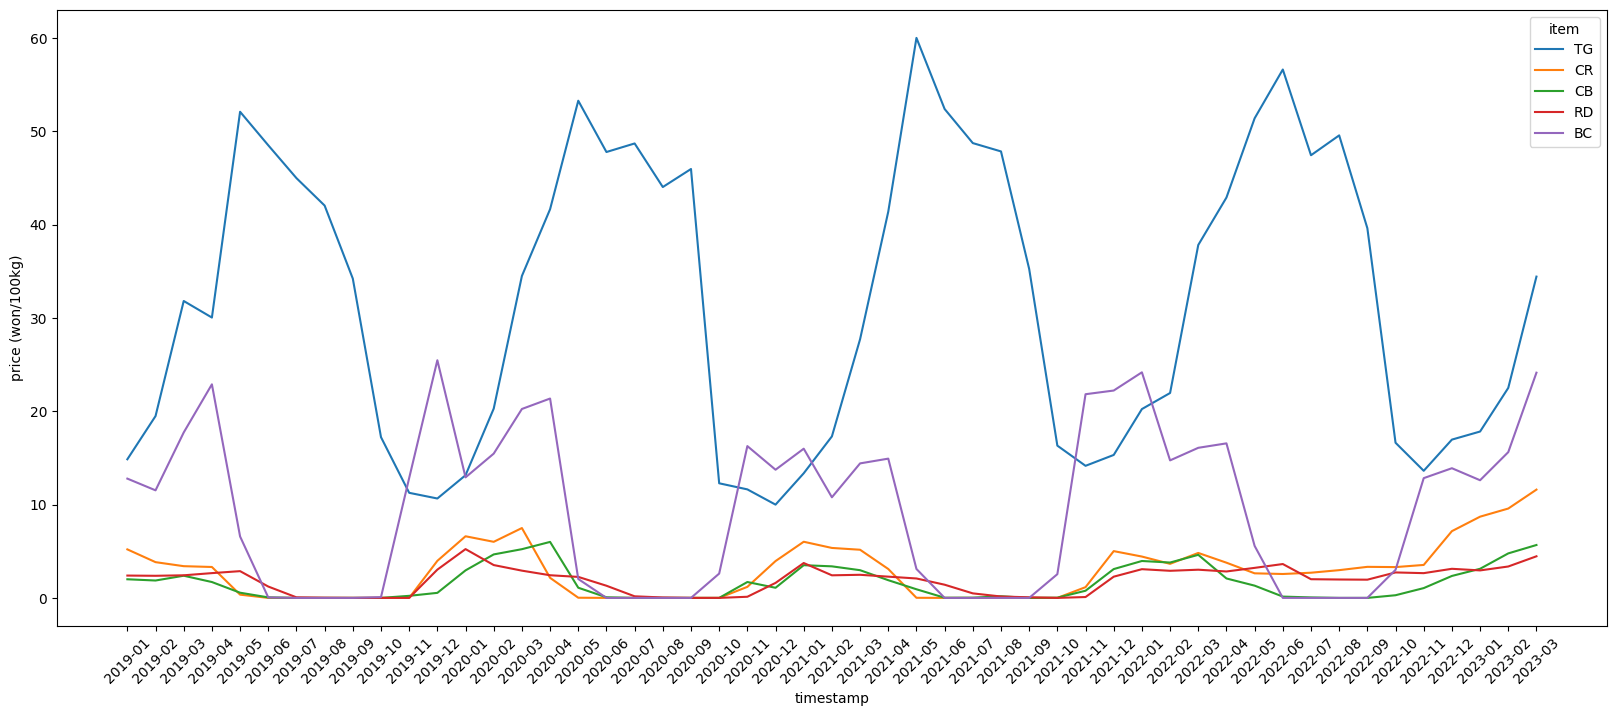

In [262]:
fig = plt.figure(figsize=(20, 8))
sns.lineplot(data=selling,
             x='yemon',
             y='price',
             hue='item',
             ci=None)
plt.xticks(rotation=45)
# ax = plt.gca()
# ax.tick_params(labelbottom=False)
plt.xlabel('timestamp')
plt.ylabel('price (won/100kg)')
plt.show()

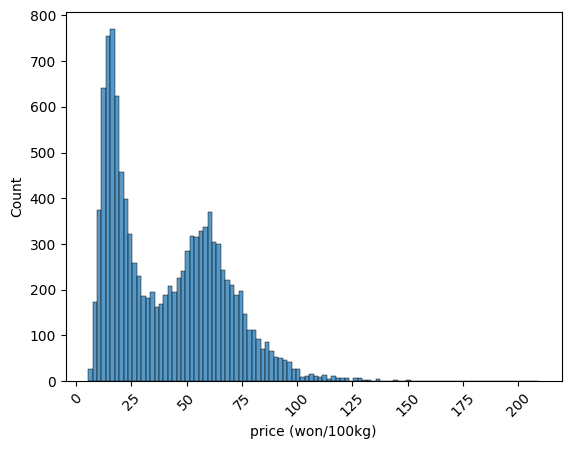

In [263]:
df=selling[(selling['item']=='TG')&(selling['price']>0)].reset_index(drop=True)
sns.histplot(data=df,
             x='price',
             binwidth=2
            )
plt.xticks(rotation=45)
plt.xlabel('price (won/100kg)')
plt.show() # 두 개의 가우시안 분포가 혼합되어 있는 모습 발견

## Draw Histplot about Each Items

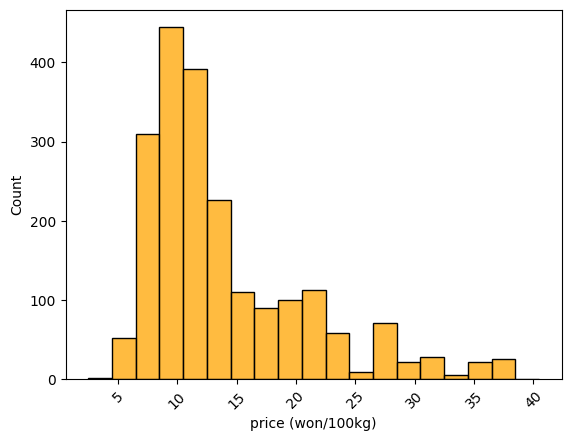

In [264]:
df=selling[(selling['item']=='CR')&(selling['price']>0)].reset_index(drop=True)
sns.histplot(data=df,
             x='price',
             binwidth=2,
            color='orange'
            )
plt.xticks(rotation=45)
plt.xlabel('price (won/100kg)')
plt.show()

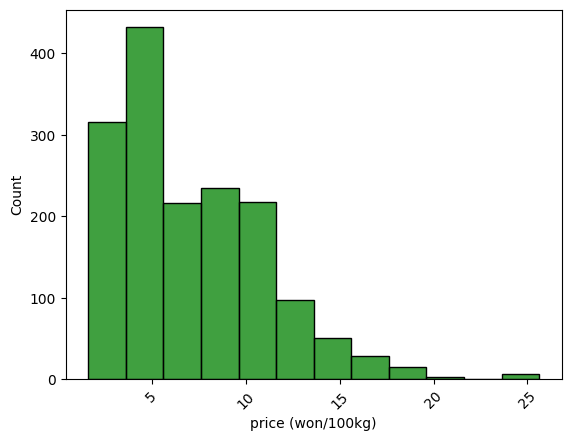

In [265]:
df=selling[(selling['item']=='CB')&(selling['price']>0)].reset_index(drop=True)
sns.histplot(data=df,
             x='price',
             binwidth=2,
            color='green'
            )
plt.xticks(rotation=45)
plt.xlabel('price (won/100kg)')
plt.show()

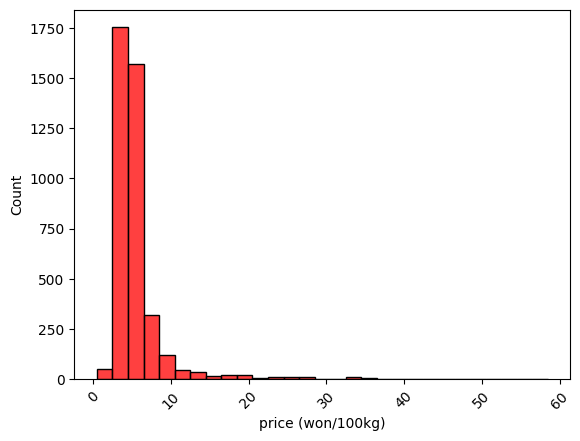

In [266]:
df=selling[(selling['item']=='RD')&(selling['price']>0)].reset_index(drop=True)
sns.histplot(data=df,
             x='price',
             binwidth=2,
             color='red'
            )
plt.xticks(rotation=45)
plt.xlabel('price (won/100kg)')
plt.show()

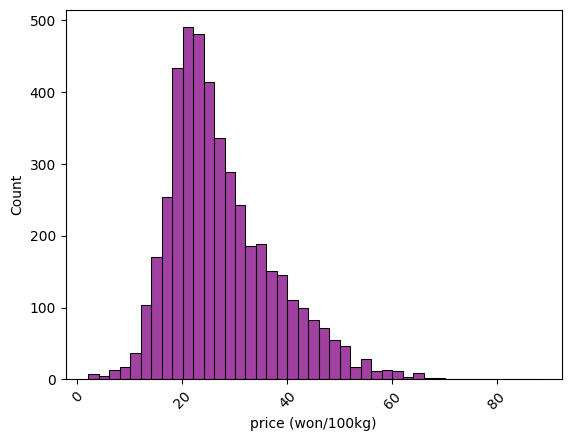

In [267]:
df=selling[(selling['item']=='BC')&(selling['price']>0)].reset_index(drop=True)
sns.histplot(data=df,
             x='price',
             binwidth=2,
             color='purple'
            )
plt.xticks(rotation=45)
plt.xlabel('price (won/100kg)')
plt.show()

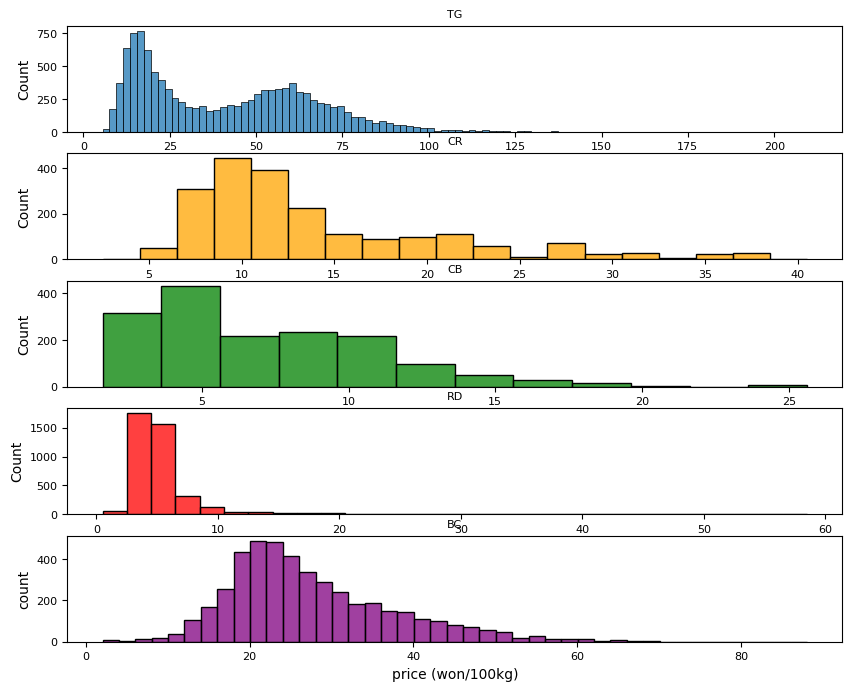

In [268]:
fig, axes = plt.subplots(5, 1, figsize=(10, 8))

df=selling[(selling['item']=='BC')&(selling['price']>0)].reset_index(drop=True)
sns.histplot(data=df,
             x='price',
             binwidth=2,
             color='purple',
             ax=axes[4]
            )
axes[4].set_title('BC',fontsize=8)
axes[4].tick_params(labelsize=8)

df=selling[(selling['item']=='CB')&(selling['price']>0)].reset_index(drop=True)
sns.histplot(data=df,
             x='price',
             binwidth=2,
            color='green',
             ax=axes[2]
            )
axes[2].set_title('CB',fontsize=8)
axes[2].tick_params(labelsize=8)

df=selling[(selling['item']=='RD')&(selling['price']>0)].reset_index(drop=True)
sns.histplot(data=df,
             x='price',
             binwidth=2,
             color='red',
             ax=axes[3]
            )
axes[3].set_title('RD',fontsize=8)
axes[3].tick_params(labelsize=8)

df=selling[(selling['item']=='CR')&(selling['price']>0)].reset_index(drop=True)
sns.histplot(data=df,
             x='price',
             binwidth=2,
            color='orange',
             ax=axes[1]
            )
axes[1].set_title('CR',fontsize=8)
axes[1].tick_params(labelsize=8)

df=selling[(selling['item']=='TG')&(selling['price']>0)].reset_index(drop=True)
sns.histplot(data=df,
             x='price',
             binwidth=2,
             ax=axes[0]
            )
axes[0].set_title('TG',fontsize=8)
axes[0].tick_params(labelsize=8)

plt.xlabel('price (won/100kg)')
plt.ylabel('count')

plt.show()

## Devide TG with Gaussian Mixture Model

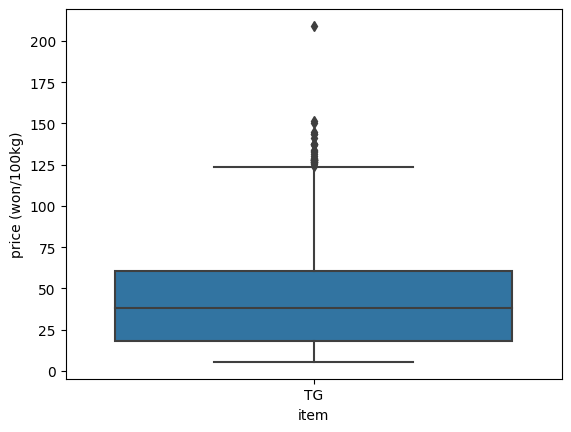

In [269]:
# GMM 모델 사용을 위해 이상치 파악 -> 해당 이상치 인덱스 백업 후 제거
tg_df=selling[(selling['item']=='TG')&(selling['price']>0)]
sns.boxplot(data=tg_df,
            x = "item",
            y = "price")
plt.ylabel('price (won/100kg)')
plt.show()

In [270]:
Q1 = tg_df[['price']].quantile(q=0.25).iloc[0]
Q3 = tg_df[['price']].quantile(q=0.75).iloc[0]
IQR = Q3-Q1

out_idx=[]
for idx in range(len(tg_df)):
    if tg_df.iloc[idx,6] > Q3+1.5*IQR:
        out_idx.append(tg_df.index[idx])

backup=tg_df.loc[out_idx,:]
backup['expen']='expensive'

tg_df=tg_df.drop(out_idx,axis=0)
tg_df

,id,timestamp,item,co_op,loc,supply,price,year,month,week,day,yemon,holiday
2,TG_A_J_20190103,2019-01-03,TG,A,J,606.01,17.28,2019,1,1,3,2019-01,0
3,TG_A_J_20190104,2019-01-04,TG,A,J,250.00,14.08,2019,1,1,4,2019-01,0
4,TG_A_J_20190105,2019-01-05,TG,A,J,323.52,12.50,2019,1,1,5,2019-01,0
6,TG_A_J_20190107,2019-01-07,TG,A,J,449.95,14.74,2019,1,2,0,2019-01,0
7,TG_A_J_20190108,2019-01-08,TG,A,J,269.75,13.26,2019,1,2,1,2019-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15225,TG_E_S_20230227,2023-02-27,TG,E,S,242.04,34.18,2023,2,9,0,2023-02,0
15226,TG_E_S_20230228,2023-02-28,TG,E,S,135.87,31.41,2023,2,9,1,2023-02,0
15227,TG_E_S_20230301,2023-03-01,TG,E,S,161.87,42.35,2023,3,9,2,2023-03,0
15228,TG_E_S_20230302,2023-03-02,TG,E,S,178.30,39.60,2023,3,9,3,2023-03,0


### Fit and Predict

In [271]:
tg_dff=tg_df[['price']]
gmm = GaussianMixture(n_components=2, random_state=42, n_init=10, max_iter=300).fit(tg_dff)
gmm_cluster_labels = gmm.predict(tg_dff)
tg_df['expen'] = gmm_cluster_labels
tg_df['expen'] = np.where(tg_df['expen'] == 0, 'expensive', 'cheap')
tg_df

,id,timestamp,item,co_op,loc,supply,price,year,month,week,day,yemon,holiday,expen
2,TG_A_J_20190103,2019-01-03,TG,A,J,606.01,17.28,2019,1,1,3,2019-01,0,cheap
3,TG_A_J_20190104,2019-01-04,TG,A,J,250.00,14.08,2019,1,1,4,2019-01,0,cheap
4,TG_A_J_20190105,2019-01-05,TG,A,J,323.52,12.50,2019,1,1,5,2019-01,0,cheap
6,TG_A_J_20190107,2019-01-07,TG,A,J,449.95,14.74,2019,1,2,0,2019-01,0,cheap
7,TG_A_J_20190108,2019-01-08,TG,A,J,269.75,13.26,2019,1,2,1,2019-01,0,cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15225,TG_E_S_20230227,2023-02-27,TG,E,S,242.04,34.18,2023,2,9,0,2023-02,0,expensive
15226,TG_E_S_20230228,2023-02-28,TG,E,S,135.87,31.41,2023,2,9,1,2023-02,0,expensive
15227,TG_E_S_20230301,2023-03-01,TG,E,S,161.87,42.35,2023,3,9,2,2023-03,0,expensive
15228,TG_E_S_20230302,2023-03-02,TG,E,S,178.30,39.60,2023,3,9,3,2023-03,0,expensive


### Scatterplot & Histplot

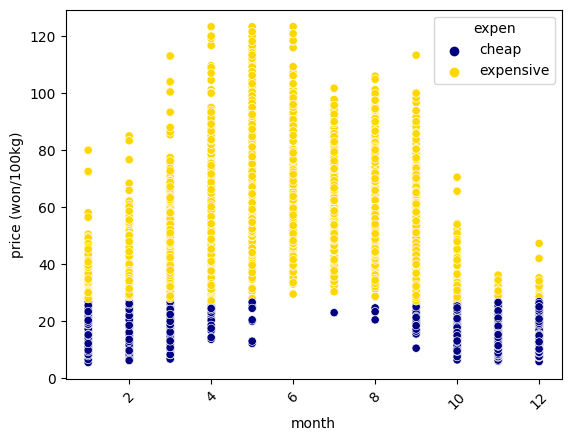

In [272]:
sns.scatterplot(data=tg_df,
                x='month',
                y='price',
                hue='expen',
                palette={'cheap':'navy',
                   'expensive':'gold'}
            )
plt.xticks(rotation=45)
plt.ylabel('price (won/100kg)')
plt.show()

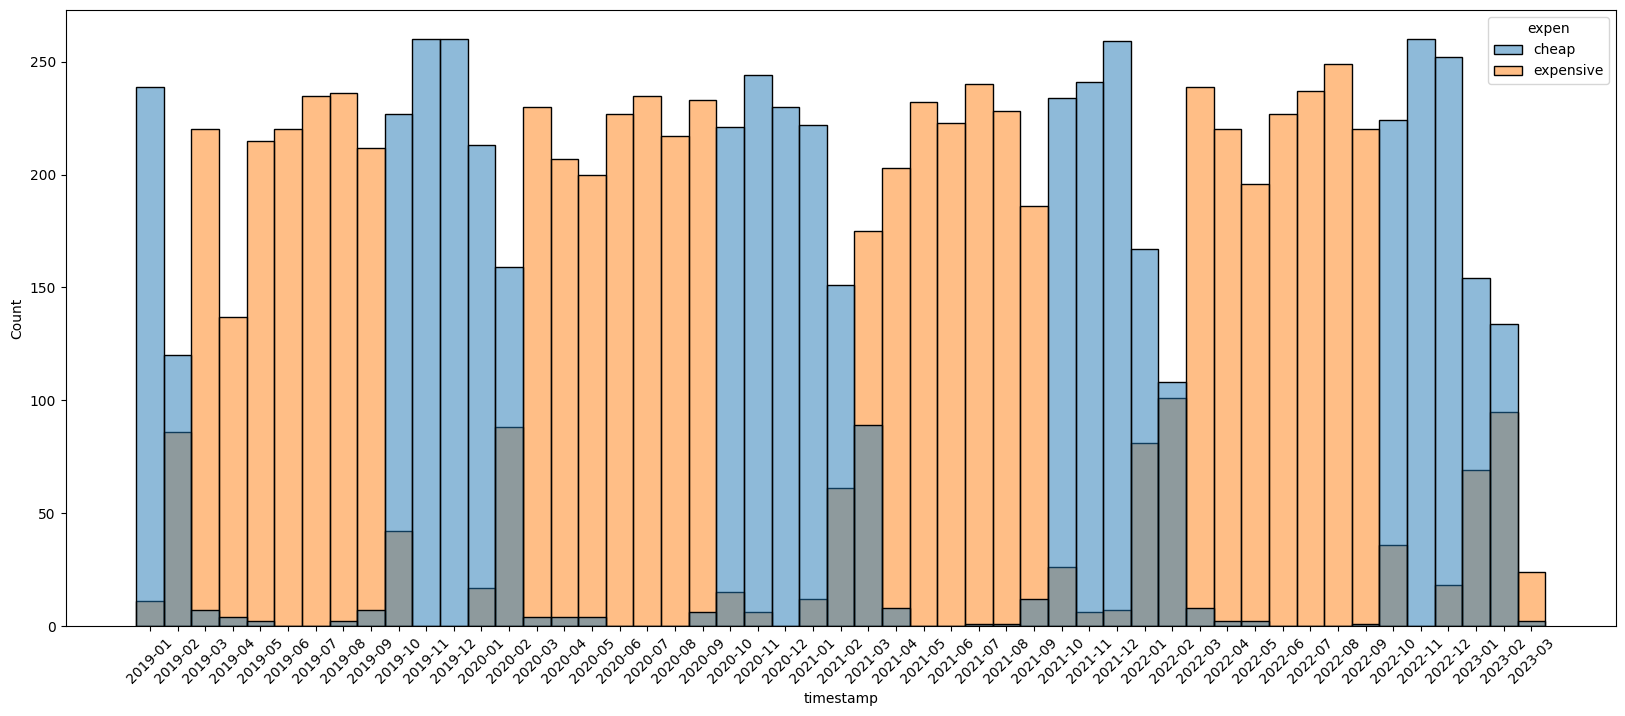

In [273]:
fig = plt.figure(figsize=(20, 8))
sns.histplot(data=tg_df,
             x='yemon',
             hue='expen'
            )

plt.xticks(rotation=45)
plt.xlabel('timestamp')
plt.show()

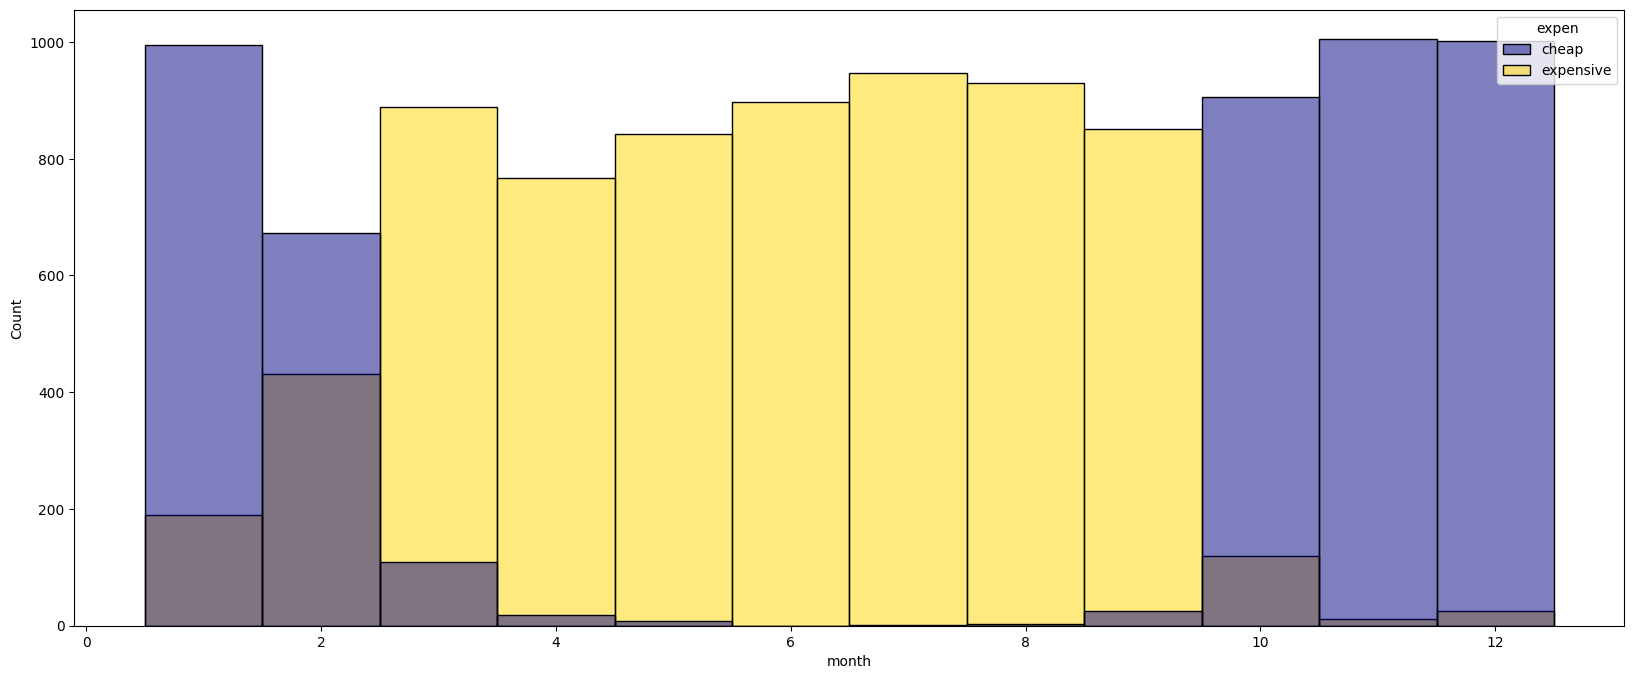

In [274]:
fig = plt.figure(figsize=(20, 8))
sns.histplot(data=tg_df,
             x='month',
             hue='expen',
            binrange=(0.5,12.5),
            binwidth=1,
             palette={'cheap':'navy',
                   'expensive':'gold'}
            )

plt.show()

# 3월부터 9월까지는 비싼 감귤 (만감류&하우스)
# 10월부터 2월까지는 싼 감귤 (노지) 이 주로 판매됨

In [275]:
# 백업해뒀던 데이터 프레임 붙여넣고 sort
tg_df=pd.concat([tg_df,backup]).sort_index()
tg_df

,id,timestamp,item,co_op,loc,supply,price,year,month,week,day,yemon,holiday,expen
2,TG_A_J_20190103,2019-01-03,TG,A,J,606.01,17.28,2019,1,1,3,2019-01,0,cheap
3,TG_A_J_20190104,2019-01-04,TG,A,J,250.00,14.08,2019,1,1,4,2019-01,0,cheap
4,TG_A_J_20190105,2019-01-05,TG,A,J,323.52,12.50,2019,1,1,5,2019-01,0,cheap
6,TG_A_J_20190107,2019-01-07,TG,A,J,449.95,14.74,2019,1,2,0,2019-01,0,cheap
7,TG_A_J_20190108,2019-01-08,TG,A,J,269.75,13.26,2019,1,2,1,2019-01,0,cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15225,TG_E_S_20230227,2023-02-27,TG,E,S,242.04,34.18,2023,2,9,0,2023-02,0,expensive
15226,TG_E_S_20230228,2023-02-28,TG,E,S,135.87,31.41,2023,2,9,1,2023-02,0,expensive
15227,TG_E_S_20230301,2023-03-01,TG,E,S,161.87,42.35,2023,3,9,2,2023-03,0,expensive
15228,TG_E_S_20230302,2023-03-02,TG,E,S,178.30,39.60,2023,3,9,3,2023-03,0,expensive


### TG -> C(heap)TG/E(xpensive)TG in Selling Table

In [276]:
for idx in range(len(tg_df)):
    if tg_df.iloc[idx,-1]=='expensive':
        tg_df.iloc[idx,2]='ETG'
    else:
        tg_df.iloc[idx,2]='CTG'
tg_df

,id,timestamp,item,co_op,loc,supply,price,year,month,week,day,yemon,holiday,expen
2,TG_A_J_20190103,2019-01-03,CTG,A,J,606.01,17.28,2019,1,1,3,2019-01,0,cheap
3,TG_A_J_20190104,2019-01-04,CTG,A,J,250.00,14.08,2019,1,1,4,2019-01,0,cheap
4,TG_A_J_20190105,2019-01-05,CTG,A,J,323.52,12.50,2019,1,1,5,2019-01,0,cheap
6,TG_A_J_20190107,2019-01-07,CTG,A,J,449.95,14.74,2019,1,2,0,2019-01,0,cheap
7,TG_A_J_20190108,2019-01-08,CTG,A,J,269.75,13.26,2019,1,2,1,2019-01,0,cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15225,TG_E_S_20230227,2023-02-27,ETG,E,S,242.04,34.18,2023,2,9,0,2023-02,0,expensive
15226,TG_E_S_20230228,2023-02-28,ETG,E,S,135.87,31.41,2023,2,9,1,2023-02,0,expensive
15227,TG_E_S_20230301,2023-03-01,ETG,E,S,161.87,42.35,2023,3,9,2,2023-03,0,expensive
15228,TG_E_S_20230302,2023-03-02,ETG,E,S,178.30,39.60,2023,3,9,3,2023-03,0,expensive


In [277]:
selling['item'].value_counts()

item
TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: count, dtype: int64

In [278]:
for idx in tg_df.index:
    selling.loc[idx,'item']=tg_df.loc[idx,'item']
    
# TG가 사라질 때까지 다음 행의 CTG, ETG 중 하나로 덮어쓰기
for _ in tqdm(range(selling['item'].value_counts()['TG'])):
    for idx in selling[selling['item']=='TG'].index:
        if selling.loc[idx,'item']=='TG':
            selling.loc[idx,'item']=selling.loc[idx+1,'item']
        if 'TG' not in selling['item'].unique():
            break
selling

100%|█████████████████████████████████████████████████████████████████████████████| 3555/3555 [00:21<00:00, 161.76it/s]


,id,timestamp,item,co_op,loc,supply,price,year,month,week,day,yemon,holiday
0,TG_A_J_20190101,2019-01-01,CTG,A,J,0.00,0.00,2019,1,1,1,2019-01,1
1,TG_A_J_20190102,2019-01-02,CTG,A,J,0.00,0.00,2019,1,1,2,2019-01,0
2,TG_A_J_20190103,2019-01-03,CTG,A,J,606.01,17.28,2019,1,1,3,2019-01,0
3,TG_A_J_20190104,2019-01-04,CTG,A,J,250.00,14.08,2019,1,1,4,2019-01,0
4,TG_A_J_20190105,2019-01-05,CTG,A,J,323.52,12.50,2019,1,1,5,2019-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,4524.40,4.68,2023,2,9,0,2023-02,0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,4219.80,5.31,2023,2,9,1,2023-02,0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,3829.80,5.74,2023,3,9,2,2023-03,0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,4772.20,5.23,2023,3,9,3,2023-03,0


In [279]:
# 전체 건수 대비 공휴일 건수 비율을 비교해 holiday 컬럼에 대한 타당성 확인
all_item=selling['item'].value_counts()
holi_item=selling[selling['holiday']==1]['item'].value_counts()
all_holi=pd.DataFrame([all_item,holi_item]).T
all_holi.columns=['all_cnt','holi_cnt']
all_holi['ratio']=round(all_holi['holi_cnt']/all_holi['all_cnt'],4)
all_holi

,all_cnt,holi_cnt,ratio
item,,,
BC,13707,581,0.0424
RD,12184,513,0.0421
CR,10661,509,0.0477
ETG,9366,236,0.0252
CB,7615,347,0.0456
CTG,5864,181,0.0309


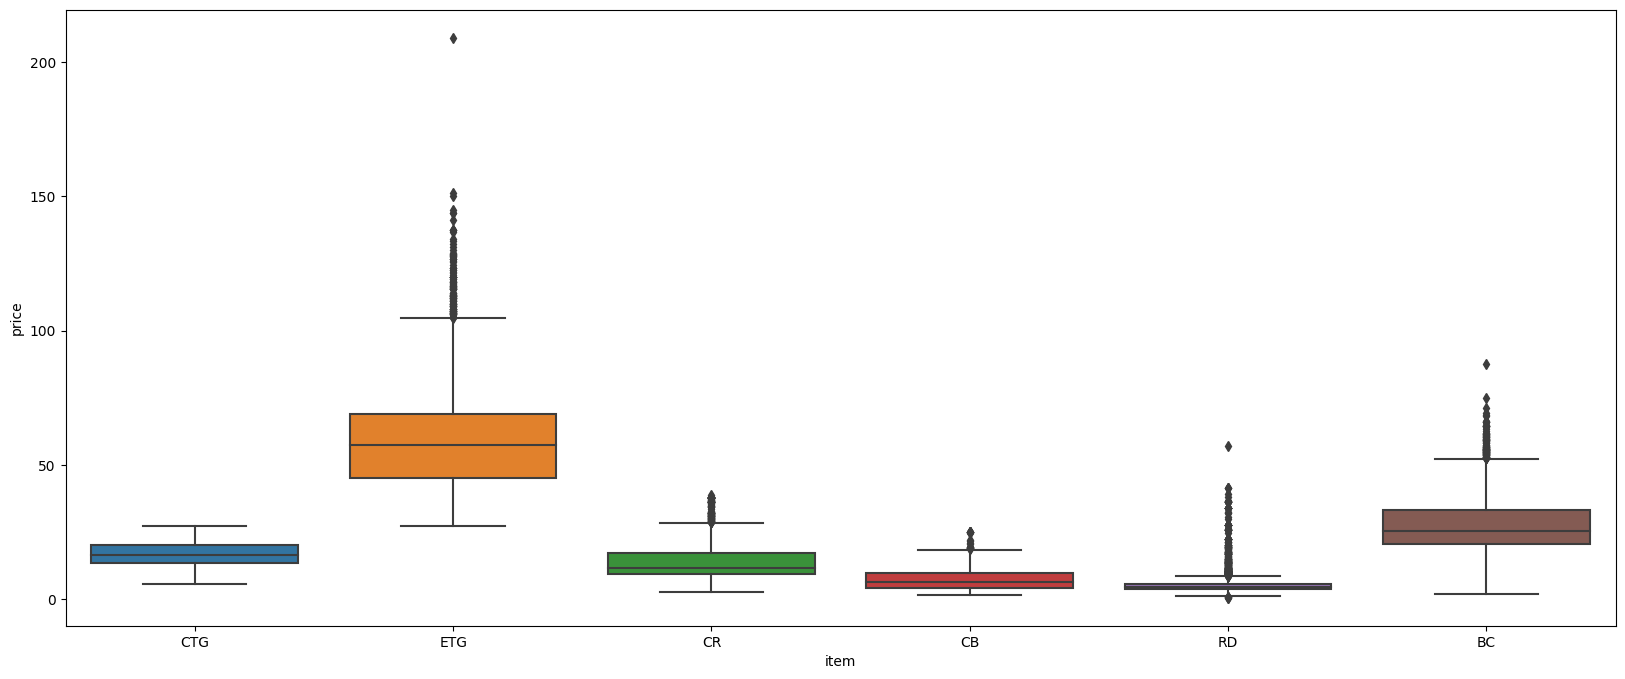

In [280]:
fig = plt.figure(figsize=(20, 8))
sns.boxplot(data=selling[selling['price']>0],
            x = "item",
            y = "price")
plt.ylabel('price')
plt.show() # 비싼 감귤(ETG) 혼자 상이한 분포를 가진 모습

C:\Users\USER\AppData\Local\Temp\ipykernel_25556\2693387204.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=selling[(selling['item']=='CTG')|(selling['item']=='ETG')],


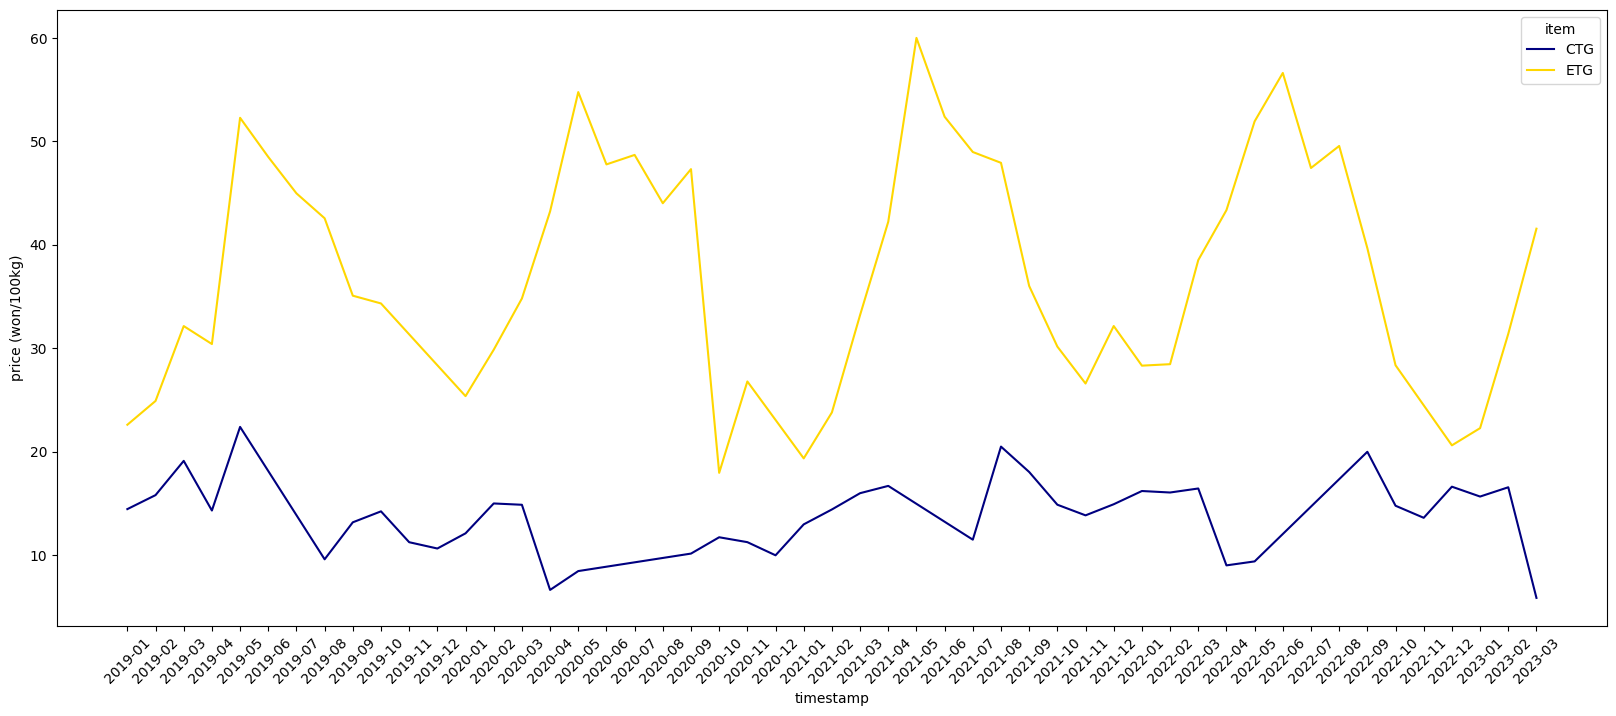

In [386]:
fig = plt.figure(figsize=(20, 8))
sns.lineplot(data=selling[(selling['item']=='CTG')|(selling['item']=='ETG')],
             x='yemon',
             y='price',
             hue='item',
             palette={'CTG':'navy',
                      'ETG':'gold'
#                       'CR':'orange',
#                       'CB':'green',
#                       'RD':'red',
#                       'BC':'purple'
                     },
             ci=None)
plt.xticks(rotation=45)
plt.xlabel('timestamp')
plt.ylabel('price (won/100kg)')
plt.show()

In [26]:
# selling.to_csv('./data/gmm_selling.csv',index=False)

# With ASOS Data

## Load Data

In [322]:
gmm_selling=pd.read_csv('./data/gmm_selling.csv')
gmm_selling

,id,timestamp,item,co_op,loc,supply,price,year,month,week,day,yemon,holiday
0,TG_A_J_20190101,2019-01-01,CTG,A,J,0.00,0.00,2019,1,1,1,2019-01,1
1,TG_A_J_20190102,2019-01-02,CTG,A,J,0.00,0.00,2019,1,1,2,2019-01,0
2,TG_A_J_20190103,2019-01-03,CTG,A,J,606.01,17.28,2019,1,1,3,2019-01,0
3,TG_A_J_20190104,2019-01-04,CTG,A,J,250.00,14.08,2019,1,1,4,2019-01,0
4,TG_A_J_20190105,2019-01-05,CTG,A,J,323.52,12.50,2019,1,1,5,2019-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,4524.40,4.68,2023,2,9,0,2023-02,0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,4219.80,5.31,2023,2,9,1,2023-02,0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,3829.80,5.74,2023,3,9,2,2023-03,0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,4772.20,5.23,2023,3,9,3,2023-03,0


In [323]:
asos = pd.read_csv('./data/asos.csv')
asos

,station,timestamp,temperture,mintem,maxtem,raining,hrrain,wind_speed,sunlight_hour,year,month,week,day,yemon
0,J,2018-01-01,6.4,4.0,8.8,0.0,0.0,3.5,2.7,2018,1,1,0,2018-01
1,J,2018-01-02,7.0,3.0,10.1,0.0,0.0,2.2,8.2,2018,1,1,1,2018-01
2,J,2018-01-03,5.0,3.5,8.4,0.0,0.0,3.4,3.2,2018,1,1,2,2018-01
3,J,2018-01-04,3.9,2.4,4.6,0.6,0.0,2.6,0.0,2018,1,1,3,2018-01
4,J,2018-01-05,5.1,1.9,6.5,4.2,0.0,4.1,0.0,2018,1,1,4,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,S,2023-02-27,8.7,4.0,13.2,8.3,0.0,1.3,10.8,2023,2,9,0,2023-02
3772,S,2023-02-28,11.9,7.2,15.2,9.9,0.0,1.4,9.5,2023,2,9,1,2023-02
3773,S,2023-03-01,12.0,9.1,14.5,11.5,0.0,1.6,3.3,2023,3,9,2,2023-03
3774,S,2023-03-02,7.2,4.9,10.5,11.5,0.0,2.2,10.8,2023,3,9,3,2023-03


## Sort Selling Data

In [324]:
gmm_selling=gmm_selling.sort_values(['loc','item','timestamp']).reset_index(drop=True)
gmm_selling

,id,timestamp,item,co_op,loc,supply,price,year,month,week,day,yemon,holiday
0,BC_A_J_20190101,2019-01-01,BC,A,J,0.0,0.00,2019,1,1,1,2019-01,1
1,BC_B_J_20190101,2019-01-01,BC,B,J,0.0,0.00,2019,1,1,1,2019-01,1
2,BC_C_J_20190101,2019-01-01,BC,C,J,0.0,0.00,2019,1,1,1,2019-01,1
3,BC_D_J_20190101,2019-01-01,BC,D,J,0.0,0.00,2019,1,1,1,2019-01,1
4,BC_E_J_20190101,2019-01-01,BC,E,J,0.0,0.00,2019,1,1,1,2019-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_E_S_20230302,2023-03-02,RD,E,S,97.0,6.78,2023,3,9,3,2023-03,0
59393,RD_A_S_20230303,2023-03-03,RD,A,S,160.6,6.13,2023,3,9,4,2023-03,0
59394,RD_C_S_20230303,2023-03-03,RD,C,S,0.0,0.00,2023,3,9,4,2023-03,0
59395,RD_D_S_20230303,2023-03-03,RD,D,S,85.8,6.01,2023,3,9,4,2023-03,0


## Add Columns about Weather Data

In [325]:
gmm_selling['avg_tem']=0
gmm_selling['max_tem']=0
gmm_selling['min_tem']=0
# gmm_selling['sum_rain']=0
gmm_selling['max_rain']=0
gmm_selling['hr_max_rain']=0
gmm_selling['max_wind']=0
gmm_selling['avg_sun']=0
agri_date={'BC':['07','10'],
           'CR':['08','11'],
           'CB':['08','11'],
           'RD':['09','11'],
           'CTG':['03','10'],
           'ETG':['10','02']}
item_uniq=gmm_selling['item'].unique()
year_unqi=list(map(lambda x:x-1,list(selling['year'].unique())))
locate=['J','S']
for loc in locate:
    for item in item_uniq:
        agri_loc=asos[asos['station']==loc].reset_index(drop=True)
        print(f'{loc} - {item}')
        for y in year_unqi:
            if int(agri_date[item][0])>int(agri_date[item][1]):
                agri_weather=agri_loc[(agri_loc['timestamp']>=(str(y-1)+'-'+str(agri_date[item][0])))&(agri_loc['timestamp']<=(str(y)+'-'+str(agri_date[item][1])))]
            else:
                agri_weather=agri_loc[(agri_loc['timestamp']>=(str(y)+'-'+str(agri_date[item][0])))&(agri_loc['timestamp']<=(str(y)+'-'+str(agri_date[item][1])))]
            avg_tem=round(agri_weather['temperture'].mean(),3)
            max_tem=max(agri_weather['maxtem'])
            min_tem=min(agri_weather['mintem'])
#             sum_rain=sum(agri_weather['raining'])
            max_rain=max(agri_weather['raining'])
            hr_max_rain=max(agri_weather['hrrain'])
            max_wind=max(agri_weather['wind_speed'])
            avg_sun=round(agri_weather['sunlight_hour'].mean(),3)
            
            idx_list=gmm_selling[(gmm_selling['item']==item)&(gmm_selling['loc']==loc)&(gmm_selling['timestamp']>=(str(y)+'-'+str(agri_date[item][1])))&(gmm_selling['timestamp']<=(str(y+1)+'-'+str(agri_date[item][1])))].index
            for idx in tqdm(idx_list):
                gmm_selling.loc[idx,'avg_tem']=avg_tem
                gmm_selling.loc[idx,'max_tem']=max_tem
                gmm_selling.loc[idx,'min_tem']=min_tem
#                 gmm_selling.loc[idx,'sum_rain']=sum_rain
                gmm_selling.loc[idx,'max_rain']=max_rain
                gmm_selling.loc[idx,'hr_max_rain']=hr_max_rain
                gmm_selling.loc[idx,'max_wind']=max_wind
                gmm_selling.loc[idx,'avg_sun']=avg_sun
        

J - BC


100%|██████████████████████████████████████████████████████████████████████████████| 770/770 [00:00<00:00, 3491.53it/s]


J - CB


100%|██████████████████████████████████████████████████████████████████████████████| 492/492 [00:00<00:00, 3064.97it/s]


J - CR


100%|██████████████████████████████████████████████████████████████████████████████| 615/615 [00:00<00:00, 3699.81it/s]


J - CTG


100%|██████████████████████████████████████████████████████████████████████████████| 666/666 [00:00<00:00, 3674.98it/s]


J - ETG


100%|████████████████████████████████████████████████████████████████████████████| 1174/1174 [00:00<00:00, 3225.60it/s]


J - RD


100%|██████████████████████████████████████████████████████████████████████████████| 492/492 [00:00<00:00, 3018.53it/s]


S - BC


100%|██████████████████████████████████████████████████████████████████████████████| 616/616 [00:00<00:00, 3597.54it/s]


S - CB


100%|██████████████████████████████████████████████████████████████████████████████| 123/123 [00:00<00:00, 3362.13it/s]


S - CR


100%|██████████████████████████████████████████████████████████████████████████████| 246/246 [00:00<00:00, 3602.83it/s]


S - CTG


100%|██████████████████████████████████████████████████████████████████████████████| 569/569 [00:00<00:00, 3738.85it/s]


S - ETG


100%|████████████████████████████████████████████████████████████████████████████| 1249/1249 [00:00<00:00, 3150.43it/s]


S - RD


100%|██████████████████████████████████████████████████████████████████████████████| 492/492 [00:00<00:00, 3718.77it/s]


In [326]:
gmm_selling

,id,timestamp,item,co_op,loc,supply,price,year,month,week,day,yemon,holiday,avg_tem,max_tem,min_tem,max_rain,hr_max_rain,max_wind,avg_sun
0,BC_A_J_20190101,2019-01-01,BC,A,J,0.0,0.00,2019,1,1,1,2019-01,1,26.677,35.3,18.5,265.4,36.6,9.8,6.546
1,BC_B_J_20190101,2019-01-01,BC,B,J,0.0,0.00,2019,1,1,1,2019-01,1,26.677,35.3,18.5,265.4,36.6,9.8,6.546
2,BC_C_J_20190101,2019-01-01,BC,C,J,0.0,0.00,2019,1,1,1,2019-01,1,26.677,35.3,18.5,265.4,36.6,9.8,6.546
3,BC_D_J_20190101,2019-01-01,BC,D,J,0.0,0.00,2019,1,1,1,2019-01,1,26.677,35.3,18.5,265.4,36.6,9.8,6.546
4,BC_E_J_20190101,2019-01-01,BC,E,J,0.0,0.00,2019,1,1,1,2019-01,1,26.677,35.3,18.5,265.4,36.6,9.8,6.546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_E_S_20230302,2023-03-02,RD,E,S,97.0,6.78,2023,3,9,3,2023-03,0,21.625,34.8,11.5,121.0,25.5,5.1,6.157
59393,RD_A_S_20230303,2023-03-03,RD,A,S,160.6,6.13,2023,3,9,4,2023-03,0,21.625,34.8,11.5,121.0,25.5,5.1,6.157
59394,RD_C_S_20230303,2023-03-03,RD,C,S,0.0,0.00,2023,3,9,4,2023-03,0,21.625,34.8,11.5,121.0,25.5,5.1,6.157
59395,RD_D_S_20230303,2023-03-03,RD,D,S,85.8,6.01,2023,3,9,4,2023-03,0,21.625,34.8,11.5,121.0,25.5,5.1,6.157


In [327]:
gmm_selling.to_csv('./data/asos_selling.csv',index=False)

## Check Correlation between 'price' & weather columns

In [328]:
asos_selling=pd.read_csv('./data/asos_selling.csv')
asos_selling=asos_selling[asos_selling['price']>0].reset_index(drop=True)
asos_selling

,id,timestamp,item,co_op,loc,supply,price,year,month,week,day,yemon,holiday,avg_tem,max_tem,min_tem,max_rain,hr_max_rain,max_wind,avg_sun
0,BC_A_J_20190103,2019-01-03,BC,A,J,76.16,25.59,2019,1,1,3,2019-01,0,26.677,35.3,18.5,265.4,36.6,9.8,6.546
1,BC_B_J_20190103,2019-01-03,BC,B,J,8.72,24.40,2019,1,1,3,2019-01,0,26.677,35.3,18.5,265.4,36.6,9.8,6.546
2,BC_C_J_20190103,2019-01-03,BC,C,J,8.00,20.79,2019,1,1,3,2019-01,0,26.677,35.3,18.5,265.4,36.6,9.8,6.546
3,BC_D_J_20190103,2019-01-03,BC,D,J,27.84,22.53,2019,1,1,3,2019-01,0,26.677,35.3,18.5,265.4,36.6,9.8,6.546
4,BC_E_J_20190103,2019-01-03,BC,E,J,65.76,23.79,2019,1,1,3,2019-01,0,26.677,35.3,18.5,265.4,36.6,9.8,6.546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23937,RD_A_S_20230302,2023-03-02,RD,A,S,426.80,5.96,2023,3,9,3,2023-03,0,21.625,34.8,11.5,121.0,25.5,5.1,6.157
23938,RD_D_S_20230302,2023-03-02,RD,D,S,172.00,6.09,2023,3,9,3,2023-03,0,21.625,34.8,11.5,121.0,25.5,5.1,6.157
23939,RD_E_S_20230302,2023-03-02,RD,E,S,97.00,6.78,2023,3,9,3,2023-03,0,21.625,34.8,11.5,121.0,25.5,5.1,6.157
23940,RD_A_S_20230303,2023-03-03,RD,A,S,160.60,6.13,2023,3,9,4,2023-03,0,21.625,34.8,11.5,121.0,25.5,5.1,6.157


In [357]:
aso=asos_selling.copy()
aso=aso[['item','supply','price','avg_tem','max_tem','min_tem',
         'max_rain','hr_max_rain','max_wind','avg_sun']]
corr = aso.corr(numeric_only=True)
corr

,supply,price,avg_tem,max_tem,min_tem,max_rain,hr_max_rain,max_wind,avg_sun
supply,1.000000,-0.269416,0.092954,0.050662,0.069211,0.117336,0.022364,0.107072,-0.010464
price,-0.269416,1.000000,-0.671456,-0.517100,-0.530441,-0.473736,-0.380703,-0.300246,-0.346230
avg_tem,0.092954,-0.671456,1.000000,0.823934,0.882547,0.504589,0.544674,0.423616,0.390134
max_tem,0.050662,-0.517100,0.823934,1.000000,0.573681,0.362713,0.351023,0.544169,0.504590
min_tem,0.069211,-0.530441,0.882547,0.573681,1.000000,0.450547,0.436742,0.373750,0.120188
max_rain,0.117336,-0.473736,0.504589,0.362713,0.450547,1.000000,0.415347,0.300554,0.163878
hr_max_rain,0.022364,-0.380703,0.544674,0.351023,0.436742,0.415347,1.000000,-0.024651,0.158503
max_wind,0.107072,-0.300246,0.423616,0.544169,0.373750,0.300554,-0.024651,1.000000,-0.092742
avg_sun,-0.010464,-0.346230,0.390134,0.504590,0.120188,0.163878,0.158503,-0.092742,1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_25556\1858434654.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(aso.corr(numeric_only=True), dtype=np.bool)


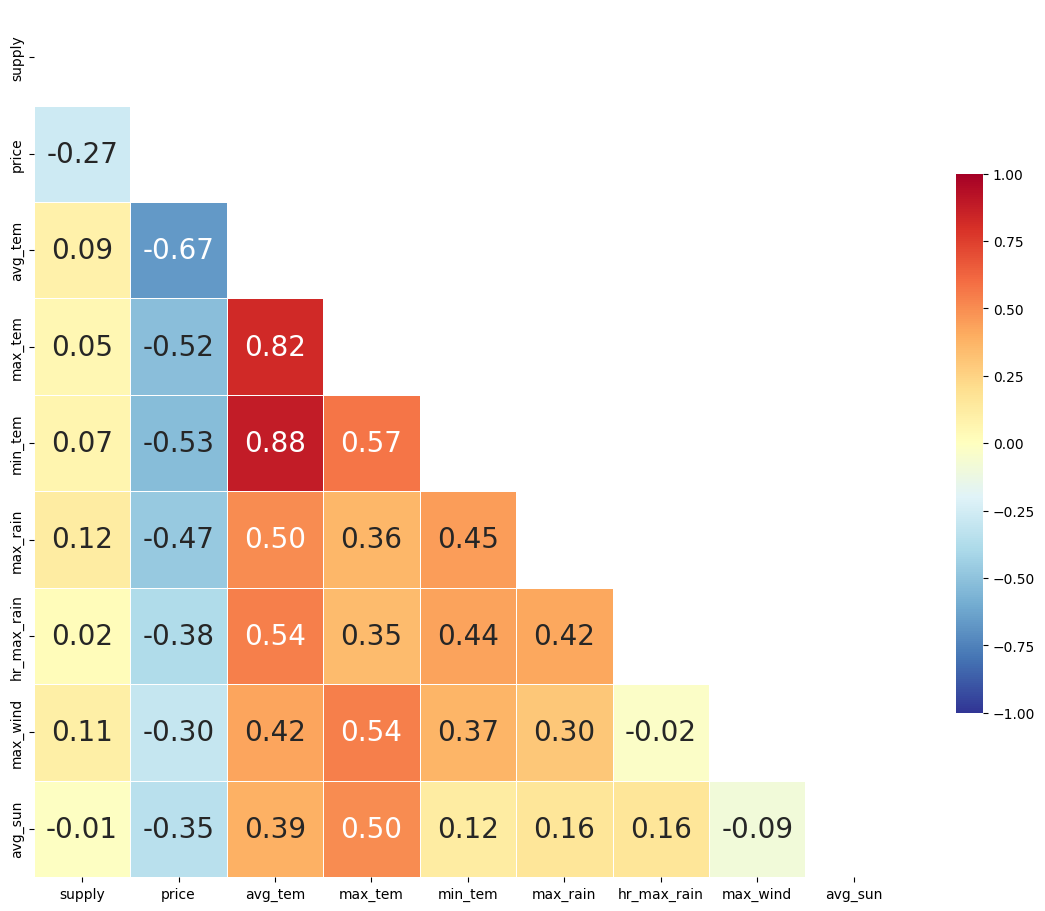

In [372]:
fig, ax = plt.subplots( figsize=(14,14) )

aso=aso.drop(['item'],axis=1)

mask = np.zeros_like(aso.corr(numeric_only=True), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

test_heatmap = sns.heatmap(corr.values,
                          cbar = True,
                           cbar_kws={"shrink": .5},
                           cmap = 'RdYlBu_r',
                           annot = True,
                          annot_kws={'size' : 20},
                           mask=mask,
                           fmt = '.2f',
                           square = 'True',
                           linewidths=.5,
                          yticklabels=aso.columns,
                          xticklabels=aso.columns,
                          vmin = -1,vmax = 1)
plt.show()

In [362]:
BC_sell=aso[aso['item']=='BC'].reset_index(drop=True)
BC_sell.corr(numeric_only=True)

,supply,price,avg_tem,max_tem,min_tem,max_rain,hr_max_rain,max_wind,avg_sun
supply,1.000000,-0.153984,0.075712,0.171786,-0.019067,0.017946,-0.124915,0.139546,0.056065
price,-0.153984,1.000000,-0.008809,-0.214290,0.207985,-0.064969,0.236098,-0.164441,-0.142123
avg_tem,0.075712,-0.008809,1.000000,0.576612,0.614741,-0.111636,0.141660,-0.148861,0.604511
max_tem,0.171786,-0.214290,0.576612,1.000000,0.007706,-0.124352,-0.406360,0.544223,0.379164
min_tem,-0.019067,0.207985,0.614741,0.007706,1.000000,0.009245,0.279000,-0.308967,0.152211
max_rain,0.017946,-0.064969,-0.111636,-0.124352,0.009245,1.000000,-0.402688,0.129732,0.517888
hr_max_rain,-0.124915,0.236098,0.141660,-0.406360,0.279000,-0.402688,1.000000,-0.463976,-0.216244
max_wind,0.139546,-0.164441,-0.148861,0.544223,-0.308967,0.129732,-0.463976,1.000000,-0.041823
avg_sun,0.056065,-0.142123,0.604511,0.379164,0.152211,0.517888,-0.216244,-0.041823,1.000000


In [368]:
CB_sell=aso[aso['item']=='CB'].reset_index(drop=True)
CB_corr=CB_sell.corr(numeric_only=True)
CB_corr

,supply,price,avg_tem,max_tem,min_tem,max_rain,hr_max_rain,max_wind,avg_sun
supply,1.000000,-0.127100,0.012410,-0.022974,-0.008987,0.066383,-0.021618,0.029618,-0.014863
price,-0.127100,1.000000,0.458483,-0.111195,-0.130555,-0.539941,0.083582,-0.322475,-0.526089
avg_tem,0.012410,0.458483,1.000000,-0.272811,-0.659638,-0.623749,0.316338,-0.728451,-0.630362
max_tem,-0.022974,-0.111195,-0.272811,1.000000,0.691937,0.122464,-0.780361,0.430128,0.547872
min_tem,-0.008987,-0.130555,-0.659638,0.691937,1.000000,0.296314,-0.835873,0.791194,0.288980
max_rain,0.066383,-0.539941,-0.623749,0.122464,0.296314,1.000000,-0.092275,0.317612,0.489367
hr_max_rain,-0.021618,0.083582,0.316338,-0.780361,-0.835873,-0.092275,1.000000,-0.744268,-0.271492
max_wind,0.029618,-0.322475,-0.728451,0.430128,0.791194,0.317612,-0.744268,1.000000,0.414304
avg_sun,-0.014863,-0.526089,-0.630362,0.547872,0.288980,0.489367,-0.271492,0.414304,1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_25556\3490007336.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(CB_sell.corr(numeric_only=True), dtype=np.bool)


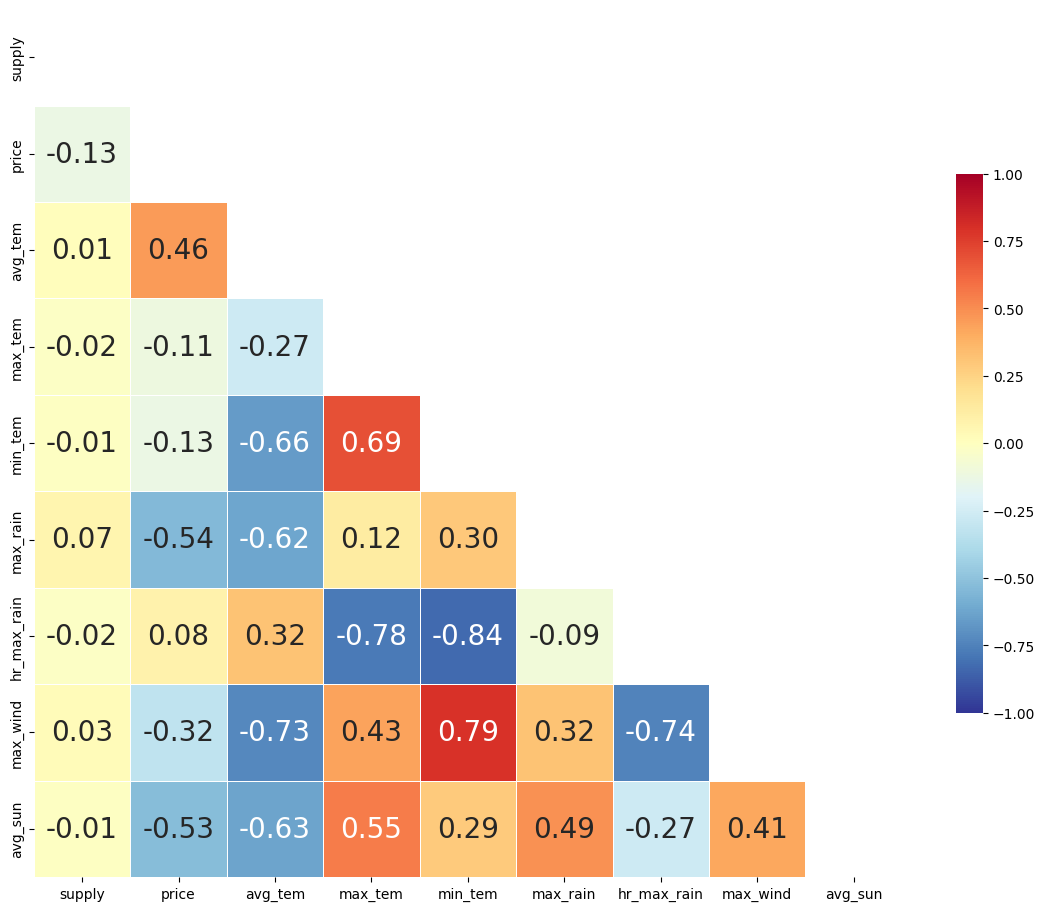

In [371]:
fig, ax = plt.subplots( figsize=(14,14) )
CB_sell=CB_sell.drop(['item'],axis=1)

mask = np.zeros_like(CB_sell.corr(numeric_only=True), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

test_heatmap = sns.heatmap(CB_corr.values,
                          cbar = True,
                           cbar_kws={"shrink": .5},
                           cmap = 'RdYlBu_r',
                           annot = True,
                          annot_kws={'size' : 20},
                           mask=mask,
                           fmt = '.2f',
                           square = 'True',
                           linewidths=.5,
                          yticklabels=CB_sell.columns,
                          xticklabels=CB_sell.columns,
                          vmin = -1,vmax = 1)
plt.show()

In [364]:
CR_sell=aso[aso['item']=='CR'].reset_index(drop=True)
CR_sell.corr(numeric_only=True)

,supply,price,avg_tem,max_tem,min_tem,max_rain,hr_max_rain,max_wind,avg_sun
supply,1.000000,-0.252621,-0.189397,0.097127,0.184224,0.072520,-0.199945,0.251100,0.056763
price,-0.252621,1.000000,0.327519,0.180224,-0.065397,-0.265755,0.051307,-0.342064,-0.175469
avg_tem,-0.189397,0.327519,1.000000,-0.404300,-0.793138,-0.656955,0.665956,-0.842328,-0.582223
max_tem,0.097127,0.180224,-0.404300,1.000000,0.656740,0.201093,-0.802292,0.443700,0.579886
min_tem,0.184224,-0.065397,-0.793138,0.656740,1.000000,0.311020,-0.894666,0.756312,0.404726
max_rain,0.072520,-0.265755,-0.656955,0.201093,0.311020,1.000000,-0.183075,0.376259,0.466007
hr_max_rain,-0.199945,0.051307,0.665956,-0.802292,-0.894666,-0.183075,1.000000,-0.800550,-0.507260
max_wind,0.251100,-0.342064,-0.842328,0.443700,0.756312,0.376259,-0.800550,1.000000,0.425904
avg_sun,0.056763,-0.175469,-0.582223,0.579886,0.404726,0.466007,-0.507260,0.425904,1.000000


In [365]:
RD_sell=aso[aso['item']=='RD'].reset_index(drop=True)
RD_sell.corr(numeric_only=True)

,supply,price,avg_tem,max_tem,min_tem,max_rain,hr_max_rain,max_wind,avg_sun
supply,1.000000,-0.129281,-0.027240,0.069242,0.033882,0.027196,-0.160850,0.255911,-0.278784
price,-0.129281,1.000000,0.297433,0.208913,-0.155847,-0.236450,-0.016365,-0.047655,-0.056023
avg_tem,-0.027240,0.297433,1.000000,0.315896,-0.434320,-0.549948,0.138042,-0.278963,0.001032
max_tem,0.069242,0.208913,0.315896,1.000000,-0.520807,-0.224406,0.035000,-0.172960,-0.257287
min_tem,0.033882,-0.155847,-0.434320,-0.520807,1.000000,-0.010190,-0.671577,0.420474,-0.108256
max_rain,0.027196,-0.236450,-0.549948,-0.224406,-0.010190,1.000000,0.056554,-0.109146,-0.146810
hr_max_rain,-0.160850,-0.016365,0.138042,0.035000,-0.671577,0.056554,1.000000,-0.591527,0.406875
max_wind,0.255911,-0.047655,-0.278963,-0.172960,0.420474,-0.109146,-0.591527,1.000000,-0.601333
avg_sun,-0.278784,-0.056023,0.001032,-0.257287,-0.108256,-0.146810,0.406875,-0.601333,1.000000


In [366]:
CTG_sell=aso[aso['item']=='CTG'].reset_index(drop=True)
CTG_sell.corr(numeric_only=True)

,supply,price,avg_tem,max_tem,min_tem,max_rain,hr_max_rain,max_wind,avg_sun
supply,1.000000,0.114184,-0.174304,-0.371433,-0.040257,0.200667,0.098021,-0.231606,-0.162663
price,0.114184,1.000000,0.250604,-0.115339,0.171904,0.135751,0.158073,-0.322843,0.086965
avg_tem,-0.174304,0.250604,1.000000,0.463840,0.655038,-0.334943,0.284418,-0.400104,0.603512
max_tem,-0.371433,-0.115339,0.463840,1.000000,-0.094302,-0.485918,-0.278605,0.516678,0.526464
min_tem,-0.040257,0.171904,0.655038,-0.094302,1.000000,-0.398804,0.463194,-0.669753,0.397502
max_rain,0.200667,0.135751,-0.334943,-0.485918,-0.398804,1.000000,-0.343608,-0.205464,-0.110149
hr_max_rain,0.098021,0.158073,0.284418,-0.278605,0.463194,-0.343608,1.000000,-0.333338,-0.468706
max_wind,-0.231606,-0.322843,-0.400104,0.516678,-0.669753,-0.205464,-0.333338,1.000000,-0.223369
avg_sun,-0.162663,0.086965,0.603512,0.526464,0.397502,-0.110149,-0.468706,-0.223369,1.000000


In [367]:
ETG_sell=aso[aso['item']=='ETG'].reset_index(drop=True)
ETG_sell.corr(numeric_only=True)

,supply,price,avg_tem,max_tem,min_tem,max_rain,hr_max_rain,max_wind,avg_sun
supply,1.000000,-0.427382,-0.187444,-0.233438,-0.059289,-0.144144,-0.140308,-0.332642,0.116139
price,-0.427382,1.000000,0.117094,0.174338,-0.002590,0.003577,0.060039,0.285366,-0.105475
avg_tem,-0.187444,0.117094,1.000000,0.854995,0.266379,0.087237,0.337732,0.242095,0.591502
max_tem,-0.233438,0.174338,0.854995,1.000000,0.117154,-0.100396,0.069225,0.447046,0.432421
min_tem,-0.059289,-0.002590,0.266379,0.117154,1.000000,0.404772,0.817094,0.041751,-0.161583
max_rain,-0.144144,0.003577,0.087237,-0.100396,0.404772,1.000000,0.700085,0.172135,-0.214075
hr_max_rain,-0.140308,0.060039,0.337732,0.069225,0.817094,0.700085,1.000000,0.274936,-0.197633
max_wind,-0.332642,0.285366,0.242095,0.447046,0.041751,0.172135,0.274936,1.000000,-0.496460
avg_sun,0.116139,-0.105475,0.591502,0.432421,-0.161583,-0.214075,-0.197633,-0.496460,1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_25556\2780847420.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=asos_selling,
C:\Users\USER\AppData\Local\Temp\ipykernel_25556\2780847420.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=asos_selling,


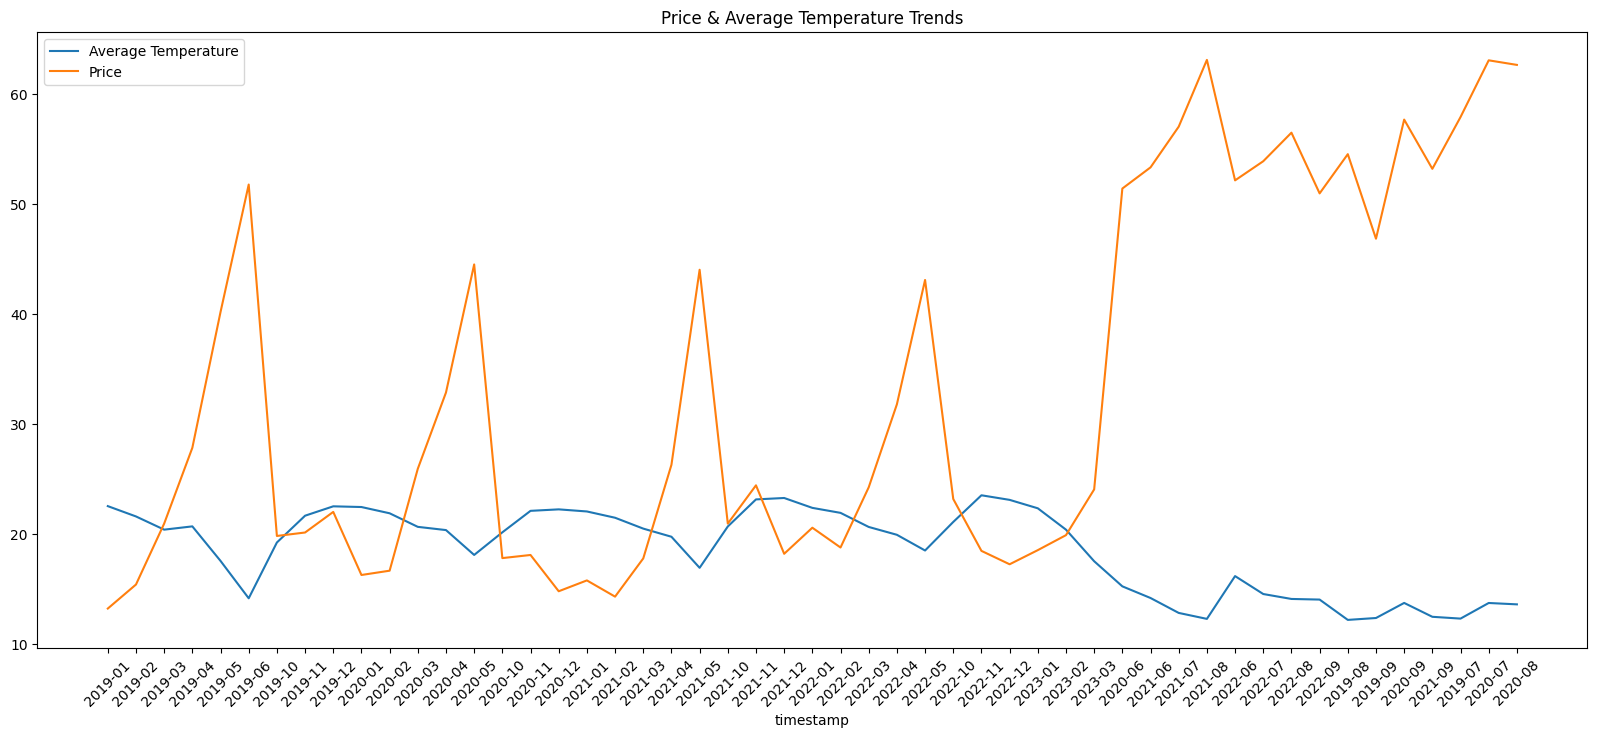

In [320]:
fig = plt.figure(figsize=(20, 8))
sns.lineplot(data=asos_selling,
             x='yemon',
             y='avg_tem',
             ci=None,
            label='Average Temperature')
sns.lineplot(data=asos_selling,
             x='yemon',
             y='price',
             ci=None,
            label='Price')
plt.xticks(rotation=45)
plt.xlabel('timestamp')
plt.ylabel('')
plt.legend()
plt.title('Price & Average Temperature Trends')
plt.show()

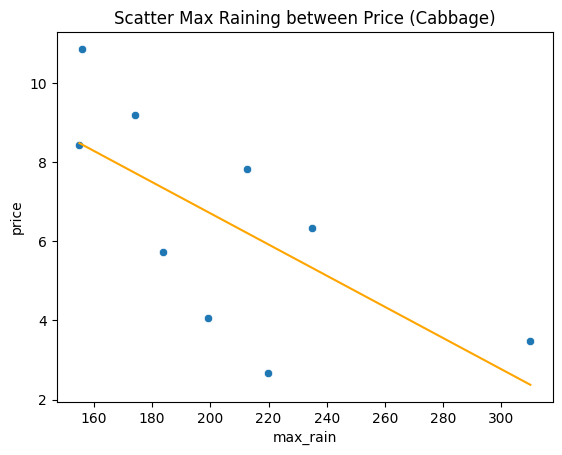

In [383]:
CB=CB_sell.groupby('max_rain',as_index=False)['price'].mean()
model = LinearRegression()
model.fit(X=CB['max_rain'].to_numpy().reshape(-1,1),
          y=CB['price'])
pred = model.predict(CB['max_rain'].to_numpy().reshape(-1,1))
pred

sns.scatterplot(data=CB,
                x='max_rain',
                y='price'
            )
sns.lineplot(x=CB['max_rain'].to_numpy(),
            y=pred,
            color='orange')
# plt.xticks(rotation=45)
# plt.ylabel('price (won/100kg)')
plt.title('Scatter Max Raining between Price (Cabbage)')
plt.show()

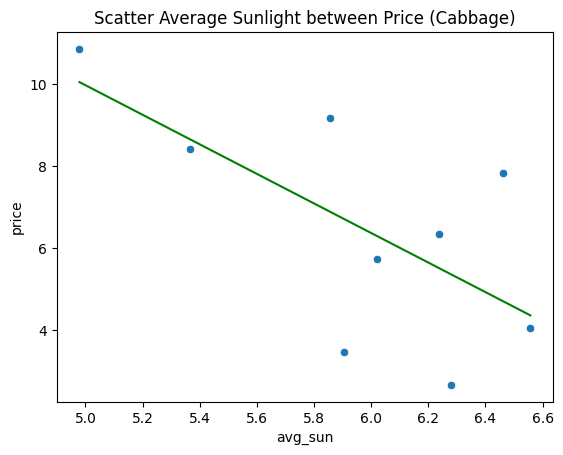

In [385]:
CB=CB_sell.groupby('avg_sun',as_index=False)['price'].mean()
model = LinearRegression()
model.fit(X=CB['avg_sun'].to_numpy().reshape(-1,1),
          y=CB['price'])
pred = model.predict(CB['avg_sun'].to_numpy().reshape(-1,1))
pred

sns.scatterplot(data=CB,
                x='avg_sun',
                y='price'
            )
sns.lineplot(x=CB['avg_sun'].to_numpy(),
            y=pred,
            color='green')
# plt.xticks(rotation=45)
# plt.ylabel('price (won/100kg)')
plt.title('Scatter Average Sunlight between Price (Cabbage)')
plt.show()